# ***神经网络基础之Python与向量化***

# 1. 向量化

① 深度学习算法中，数据量很大，在程序中应该尽量减少使用loop循环语句，而可以使用向量运算来提高程序运行速度。

② 向量化（Vectorization）就是利用矩阵运算的思想，大大提高运算速度。例如下面所示在Python中使用向量化要比使用循环计算速度快得多。

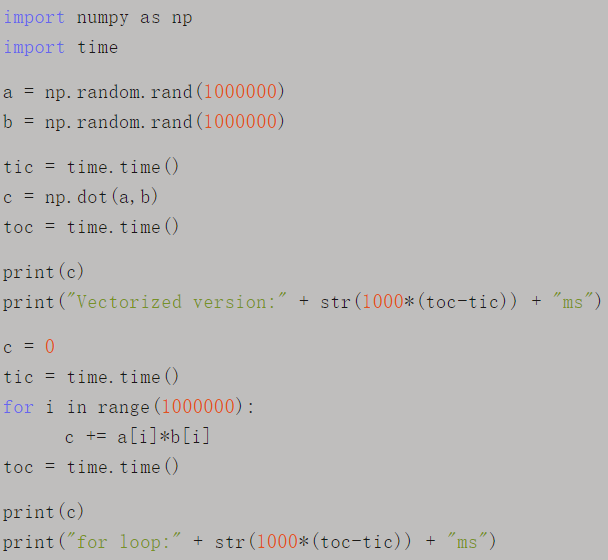

③ 输出结果类似于：

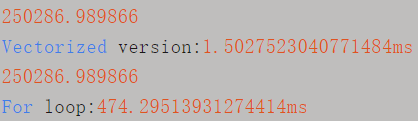

④ 从程序运行结果上来看，该例子使用for循环运行时间是使用向量运算运行时间的约300倍。因此，深度学习算法中，使用向量化矩阵运算的效率要高得多。

① 为了加快深度学习神经网络运算速度，可以使用比CPU运算能力更强大的GPU。

② 事实上，GPU和CPU都有并行指令（parallelization instructions），称为Single Instruction Multiple Data（SIMD）。SIMD是单指令多数据流，能够复制多个操作数，并把它们打包在大型寄存器的一组指令集。

③ SIMD能够大大提高程序运行速度，例如python的numpy库中的内建函数（built-in function）就是使用了SIMD指令。相比而言，GPU的SIMD要比CPU更强大一些。

① 上一部分我们讲了应该尽量避免使用for循环而使用向量化矩阵运算。在python的numpy库中，我们通常使用np.dot()函数来进行矩阵运算。

② 我们将向量化的思想使用在逻辑回归算法上，尽可能减少for循环，而只使用矩阵运算。

③ 值得注意的是，算法最顶层的迭代训练的for循环是不能替换的。而每次迭代过程对J，dw，b的计算是可以直接使用矩阵运算。

# 2. 逻辑回归向量化

① 我们前面介绍过，整个训练样本构成的输入矩阵X的维度是（$n_{x}$，m），权重矩阵w的维度是（$n_{x}$，1），b是一个常数值，而整个训练样本构成的输出矩阵Y的维度为（1，m）。

② 利用向量化的思想，所有m个样本的线性输出Z可以用矩阵表示：

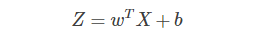

③ 在python的numpy库中可以如下表示，其中，w.T表示w的转置。

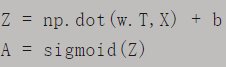

④ 这样，我们就能够使用向量化矩阵运算代替for循环，对所有m个样本同时运算，大大提高了运算速度。

# 3. 逻辑回归向量化梯度下降

① 再来看逻辑回归中的梯度下降算法如何转化为向量化的矩阵形式。

② 对于所有m个样本，dZ的维度是（1，m），可表示为：

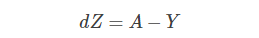

③ db可表示为：

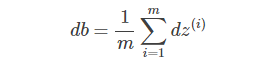

④ 对应的程序为：

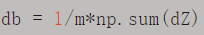

⑤ dw可表示为：

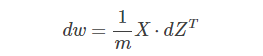

⑥ 对应的程序为：

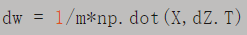

⑦ 这样，我们把整个逻辑回归中的for循环尽可能用矩阵运算代替，对于单次迭代，梯度下降算法流程如下所示：

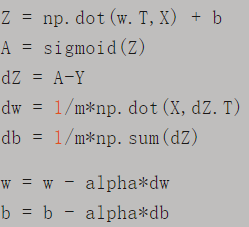

⑧ 其中，alpha是学习因子，决定w和b的更新速度。上述代码只是对单次训练更新而言的，外层还需要一个for循环，表示迭代次数。

# 4. Python广播

① 下面介绍使用python的另一种技巧：广播（Broadcasting）。python中的广播机制可由下面四条表示：

 - 让所有输入数组都向其中shape最长的数组看齐，shape中不足的部分都通过在前面加1补齐。

 - 输出数组的shape是输入数组shape的各个轴上的最大值。

 - 如果输入数组的某个轴和输出数组的对应轴的长度相同或者其长度为1时，这个数组能够用来计算，否则出错。

 - 当输入数组的某个轴的长度为1时，沿着此轴运算时都用此轴上的第一组值。
 
② 简而言之，就是python中可以对不同维度的矩阵进行四则混合运算，但至少保证有一个维度是相同的。

③ 下面给出几个广播的例子，具体细节可参阅python的相关手册，这里就不赘述了。

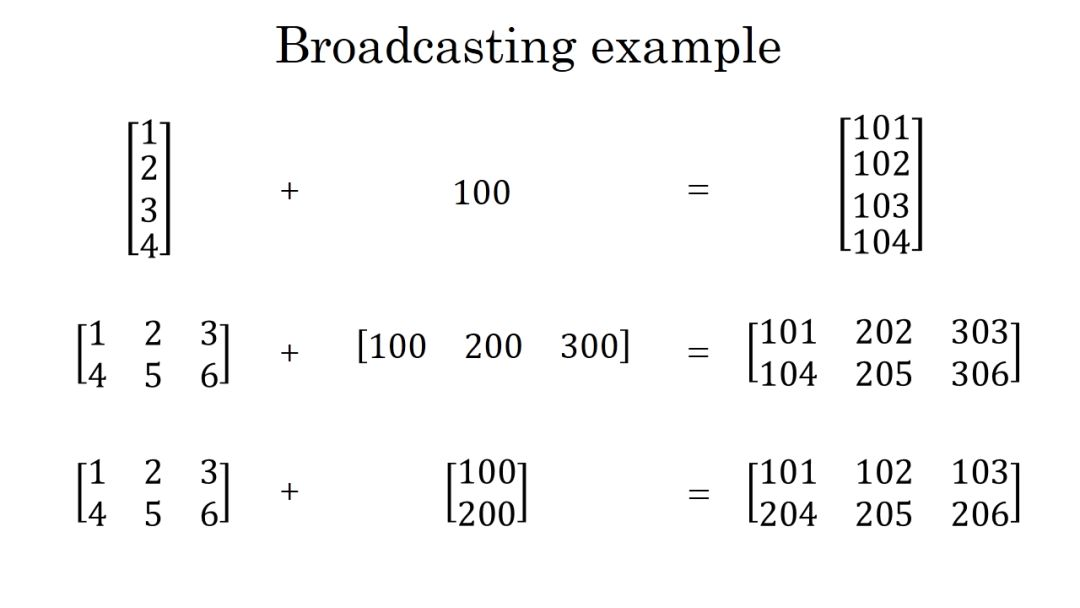

④ 值得一提的是，在python程序中为了保证矩阵运算正确，可以使用reshape()函数来对矩阵设定所需的维度。这是一个很好且有用的习惯。

# 5. Python小技巧

① 接下来我们将总结一些python的小技巧，避免不必要的code bug。

② python中，如果我们用下列语句来定义一个向量：

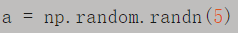

③ 这条语句生成的a的维度是（5，）。它既不是行向量也不是列向量，我们把a叫做rank 1 array。

④ 这种定义会带来一些问题。例如我们对a进行转置，还是会得到a本身。

⑤ 所以，如果我们要定义（5，1）的列向量或者（1，5）的行向量，最好使用下来标准语句，避免使用rank 1 array。

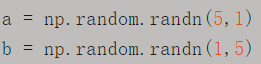

⑥ 除此之外，我们还可以使用assert语句对向量或数组的维度进行判断，例如：



⑦ assert会对内嵌语句进行判断，即判断a的维度是不是（5，1）的。如果不是，则程序在此处停止。使用assert语句也是一种很好的习惯，能够帮助我们及时检查、发现语句是否正确。

⑧ 另外，还可以使用reshape函数对数组设定所需的维度：

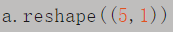

# 6. 逻辑回归损失函数

① 我们介绍过逻辑回归的Cost function。接下来我们将简要解释这个Cost function是怎么来的。

② 首先，预测输出y^的表达式可以写成：



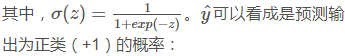

③ 那么，当y=1时：

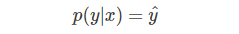

④ 当y=0时：

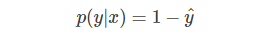

⑤ 我们把上面两个式子整合到一个式子中，得到：

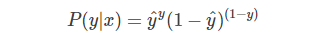

⑥ 由于log函数的单调性，可以对上式P(y|x)进行log处理：

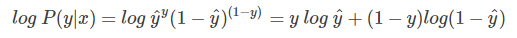

⑦ 我们希望上述概率P(y|x)越大越好，对上式加上负号，则转化成了单个样本的Loss function，越小越好，也就得到了我们之前介绍的逻辑回归的Loss function形式。

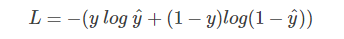

⑧ 如果对于所有m个训练样本，假设样本之间是独立同分布的，我们希望总的概率越大越好：

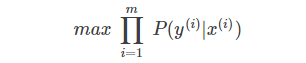

⑨ 同样引入log函数，加上负号，将上式转化为Cost function：

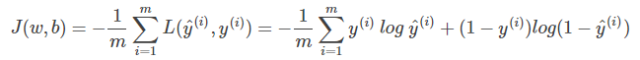

⑩ 上式中，1/m表示对所有m个样本的Cost function求平均，是缩放因子。

# 7. 总结

① 本节课我们主要介绍了神经网络基础——python和向量化。

② 在深度学习程序中，使用向量化和矩阵运算的方法能够大大提高运行速度，节省时间。

③ 以逻辑回归为例，我们将其算法流程包括梯度下降转换为向量化的形式。

④ 同时，我们也介绍了python的相关编程方法和技巧。